# Part 2: Additional Analysis of the Storks Data

**Table of Contents**

1. Section 1: Introduction

2. Section 2: Regression Models for the Number of Births
 * Section 2.1: Model for the Number of Storks
 * Section 2.2: Model for the Human Population
 * Section 2.3: The Difference in the R2 Parameter for the Two Models
3. Section 3: Regression Models for the Number of Storks
 * Section 3.1: Model for Land Area
 * Section 3.2: Model for Population Density and Suitable Land Area
 * Section 3.3: The Difference in the Root Mean Squared Error (RMSE) Parameter for the Two Models

## Section 1: Introduction
This notebook presents an analysis of the storks data. The aim of this analysis is to compare two regression models to explain the variability of the number of births.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
storks = pd.read_csv('storks.csv')

## Section 2: Regression Models for the Number of Births
Here, two regression models are implemented for the number of births. The first model uses the number of storks as its predictor, while the second model uses the population size as its predictor.

### Section 2.1: Model for the Number of Storks
Below the BirthRate and Storks data are inputted to a regression model and the results are shown on a scatter plot.

Text(0, 0.5, 'Actual Value')

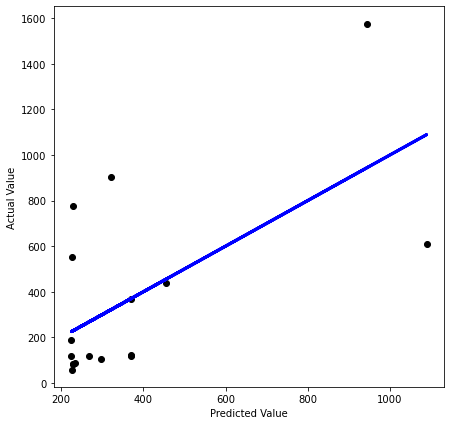

In [3]:
y = (storks.BirthRate)
x = np.column_stack([storks.Storks])

reg = LinearRegression().fit(x, y)

y_hat = reg.predict(x)

fig, a = plt.subplots(1,1,figsize=(7,7))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

The plot above shows that as a predictor of the number of births, the number of storks is not particularly accurate. A regression of better fit, i.e. more accurate predictors, would see the points closer to the blue line.

### Section 2.2: Model for the Human Population
Below the BirthRate and Humans data are inputted to a regression model and the results are shown on a scatter plot.

Text(0, 0.5, 'Actual Value')

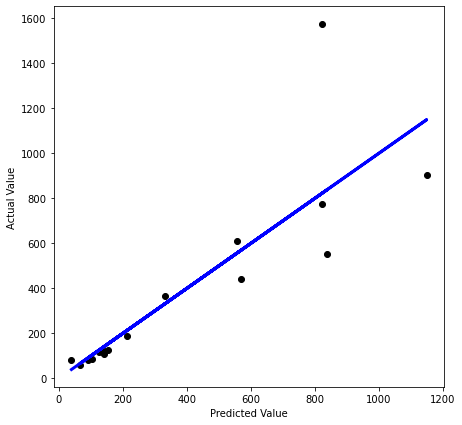

In [4]:
y = (storks.BirthRate)
x = np.column_stack([storks.Humans])

reg = LinearRegression().fit(x, y)

y_hat = reg.predict(x)

fig, a = plt.subplots(1,1,figsize=(7,7))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

This plot shows that as a predictor of the number of births, the human population is fairly accurate. The population is a much more accurate predictor of the number of births than the number of storks.

### Section 2.3: The Difference in the R2 Parameter for the Two Models
Here, the bootstrap technique is used to estimate the distribution of the difference in the
R2 parameter for the two models. This technique takes a sample of data containing a certain number of values - in this case 500 - from Storks (first model) and Humans (second model). The distribution of the coefficients of determination (R2) are then plotted with histograms.

In [5]:
from sklearn.utils import resample

In [6]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result

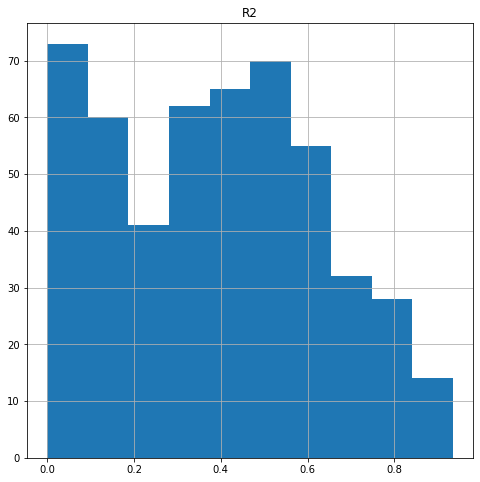

In [7]:
def doRegression(storks):
    y = (storks.BirthRate)
    x = np.column_stack([storks.Storks])
    reg = LinearRegression().fit(x, y)
    return [reg.score(x, y)] 

bstrapStorks = bootstrapC(storks, ['R2'], 500, doRegression) 
_ = bstrapStorks.hist(figsize=(8,8))

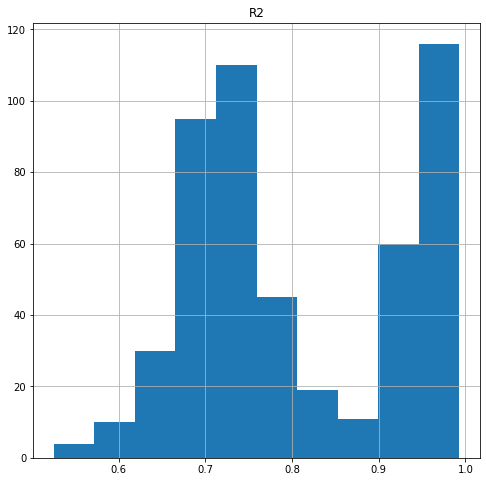

In [8]:
def doRegression(storks):
    y = (storks.BirthRate)
    x = np.column_stack([storks.Humans])
    reg = LinearRegression().fit(x, y)
    return [reg.score(x, y)] 

bstrapHumans = bootstrapC(storks, ['R2'], 500, doRegression) 
_ = bstrapHumans.hist(figsize=(8,8))

,R2difference,StorksR2,HumansR2
0,-0.639248,0.314765,0.954013
1,-0.305042,0.444467,0.749509
2,-0.330582,0.490405,0.820987
3,-0.683114,0.250889,0.934003
4,-0.440645,0.530506,0.971152
...,...,...,...
495,-0.605569,0.176630,0.782199
496,-0.366548,0.376741,0.743289
497,-0.300842,0.412994,0.713836
498,-0.225484,0.511082,0.736566


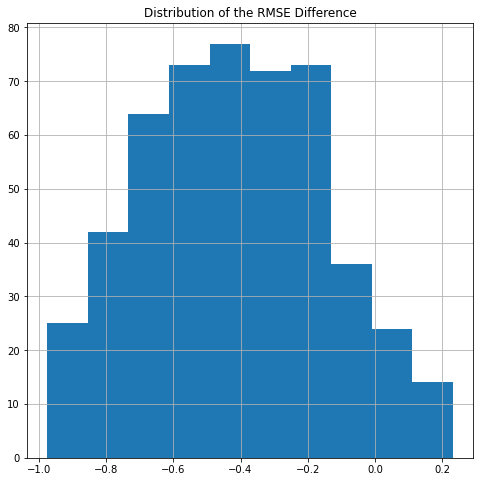

In [9]:
R2diff = (bstrapStorks - bstrapHumans)
R2values = pd.DataFrame().assign(R2difference = R2diff, StorksR2 = bstrapStorks, HumansR2 = bstrapHumans)
R2diff.hist(figsize=(8,8))
plt.title('Distribution of the RMSE Difference')

R2values

In [10]:
R2values.describe()

,R2difference,StorksR2,HumansR2
count,500.000000,5.000000e+02,500.000000
mean,-0.415690,3.891519e-01,0.804842
std,0.270299,2.423033e-01,0.121138
min,-0.975195,3.881072e-07,0.524936
25%,-0.620274,1.652623e-01,0.707603
50%,-0.421093,3.951089e-01,0.760470
75%,-0.219051,5.637131e-01,0.939927
max,0.232220,9.350698e-01,0.993120


The above table shows we can be confident that the population of humans model explains more of the variability in the number of births than the number of storks model. The Humans model has a mean and median coefficient of determination of 0.8 and 0.757, respectively; while for the Storks model the same figures stand at 0.385 and 0.387. An R2 value of 1 indicates that 100% of the variability in the number of human births can be explained by the variability in the predictor. Thus the higher R2 values for the Human model mean that the human population is a more accurate predictor of the birth rate than the number of storks.

In [11]:
R2diff.R2.quantile(0.05)

-0.8534975308337295

In [12]:
R2diff.R2.quantile(0.95)

0.052184945105884624

A 90% confidence interval (CI) from -0.851 to 0.039 for the difference in the R2 parameter for the two models means that - given this R2 range - if this experiment were repeated continuously, 90% of the time the results will match that of the population. Given the R2 difference range of -0.996 to 0.279, there is only a small proportion of values in the upper and lower limits where the CI would drop below 90%. Therefore, it can be said that together the two models are strong predictors of the birth rate.

## Section 3: Regression Models for the Number of Storks
Here, two regression models are implemented for the number of storks. The first model uses land area as its predictor, while the second model uses population density and suitable land area as its predictor.

### Section 3.1: Model for Land Area
Below the Storks and Area data are inputted to a regression model and the results are shown on a scatter plot.

Text(0, 0.5, 'Actual Value')

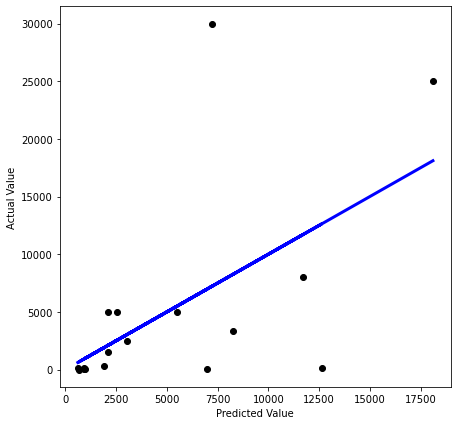

In [13]:
y = (storks.Storks)
x = np.column_stack([storks.Area])

reg = LinearRegression().fit(x, y)

y_hat = reg.predict(x)

fig, a = plt.subplots(1,1,figsize=(7,7))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

This plot shows that as a predictor of the number of storks, land area is fairly accurate. It is a better predictor when the actual number of storks is lower, as can be seen by a greater concentration of black dots around the blue line towards the bottom left of the plot.

### Section 3.2: Model for Population Density and Suitable Land Area

Below a population density variable is defined by dividing the human population by land, thus giving the number of humans per unit of land. The Storks, PopulationDensity and SuitableAreaPercent data are then inputted to a regression model and the results are shown on a scatter plot.

In [25]:
PopulationDensity = storks.Humans / storks.Area

Text(0, 0.5, 'Actual Value')

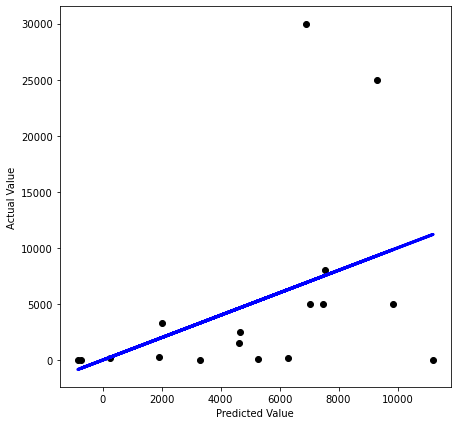

In [26]:
y = (storks.Storks)
x = np.column_stack((PopulationDensity, storks.SuitableAreaPercent))

reg = LinearRegression().fit(x, y)

y_hat = reg.predict(x)

fig, a = plt.subplots(1,1,figsize=(7,7))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

This plot shows that as a predictor of the number of storks, population density and suitable land area are fairly accurate. The concentration of black dots (actual values) under the blue line show that, more often than not, this model is predicting values that are less than the actual values. 

### Section 3.3: The Difference in the RMSE Parameter for the Two Models
Below, the distribution of RMSE values for each model is shown with histograms.

In [16]:
from sklearn.metrics import mean_squared_error

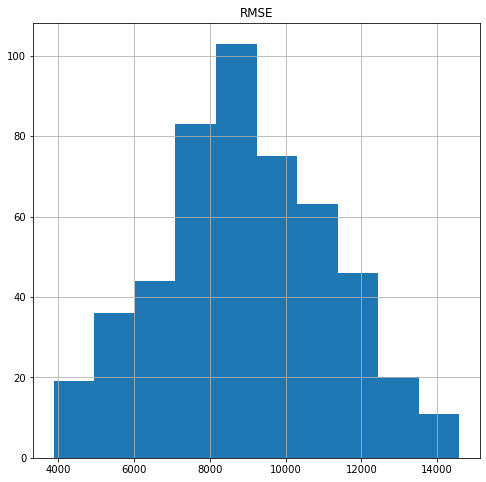

In [17]:
def doRegression(storks):
    y = (storks.Storks)
    x = np.column_stack([storks.Area])
    reg = LinearRegression().fit(x, y)
    return [mean_squared_error(y, y_hat, squared=False)] 

bstrapArea = bootstrapC(storks, ['RMSE'], 500, doRegression) 
_ = bstrapArea.hist(figsize=(8,8))

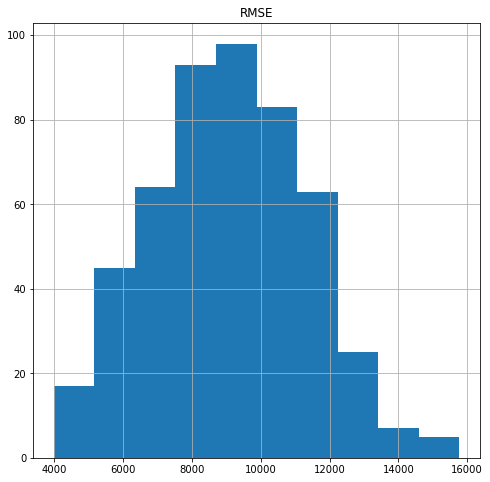

In [18]:
def doRegression(storks):
    y = (storks.Storks)
    x = np.column_stack((populationDensity, storks.SuitableAreaPercent))
    reg = LinearRegression().fit(x, y)
    return [mean_squared_error(y, y_hat, squared=False)] 

bstrapLand = bootstrapC(storks, ['RMSE'], 500, doRegression) 
_ = bstrapLand.hist(figsize=(8,8))

,RMSEdifference,AreaRMSE,LandRMSE
0,-5462.935406,7339.013224,12801.948630
1,2358.075396,8075.491450,5717.416054
2,1534.945637,8541.469488,7006.523851
3,5033.184832,9019.883733,3986.698902
4,-805.565904,8351.909103,9157.475008
...,...,...,...
495,-6928.634206,5782.208110,12710.842316
496,6595.272775,13907.769121,7312.496346
497,-4036.455824,7262.703598,11299.159422
498,4207.118638,10646.829611,6439.710973


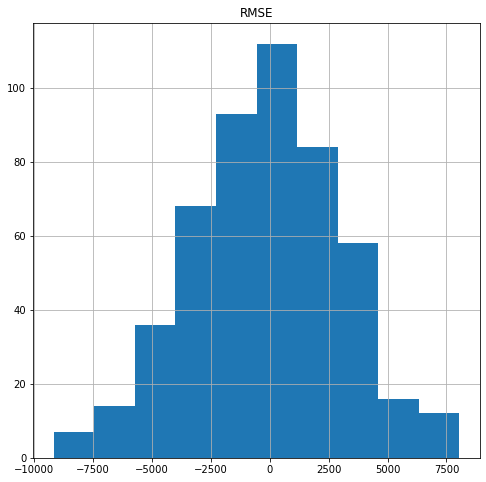

In [19]:
RMSEdiff = (bstrapArea - bstrapLand)
RMSEvalues = pd.DataFrame().assign(RMSEdifference = RMSEdiff, AreaRMSE = bstrapArea, LandRMSE = bstrapLand)
RMSEdiff.hist(figsize=(8,8))
RMSEvalues

In [20]:
RMSEvalues.describe()

,RMSEdifference,AreaRMSE,LandRMSE
count,500.000000,500.000000,500.000000
mean,-99.527589,8972.369429,9071.897018
std,3150.145974,2223.536424,2219.066471
min,-9159.552008,3883.627637,3986.698902
25%,-2202.907821,7450.928179,7519.842819
50%,-62.151849,8925.188815,9082.280090
75%,2193.376576,10634.489137,10621.836975
max,8050.116635,14585.971365,15773.232763


The above table shows that the land area model is a fractionally better predictor of the number of storks than the population density and area of suitable land model. This can be deduced from the fact that the root mean squared error (RMSE) values for the Area model are slightly lower than that of the corresponding Land model values. 

In [21]:
RMSEdiff.RMSE.quantile(0.05)

-5309.075316871151

In [22]:
RMSEdiff.RMSE.quantile(0.95)

5034.730099156468

A 90% CI from -5309 to 5035 for the difference in the RMSE parameter for the two models means that - given this RMSE range - if this experiment were repeated continuously, 90% of the time the results will match that of the population. However, given the RMSE difference range of -9160 to 8050 there is a significant proportion of values in the upper and lower limits where the CI would be less than 90%. Therefore when looking at the difference in the RMSE parameter between the actual and predicted values for the two models, there are a significant number of values that could be inaccurate given a CI of less than 90%. In the case of RMSE, this could either mean that the prediction is better given that a lower RMSE value means the prediction is more accurate; or if the RMSE value is higher the prediction is worse. Another way of explaining this is that a lower RMSE value will give a prediction line that is closer to the line of best fit.